<a href="https://colab.research.google.com/github/PaulinaRuizB/Machine_Learning_Theory/blob/main/Homeworks/Deep%20Learning/Cuaderno_2_API_keras_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.19.0


In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Base de datos importada
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ red1 (Dense)                    │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hred2 (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

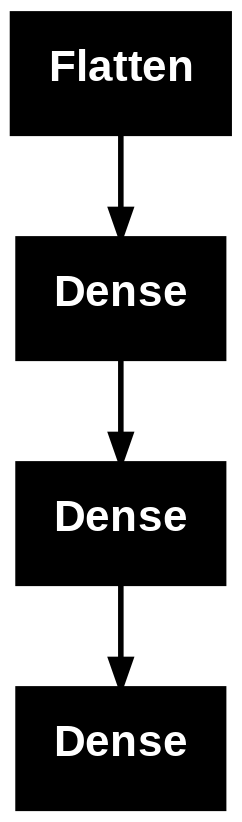

In [ ]:
#definir arquitectura secuencial a través de capas
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


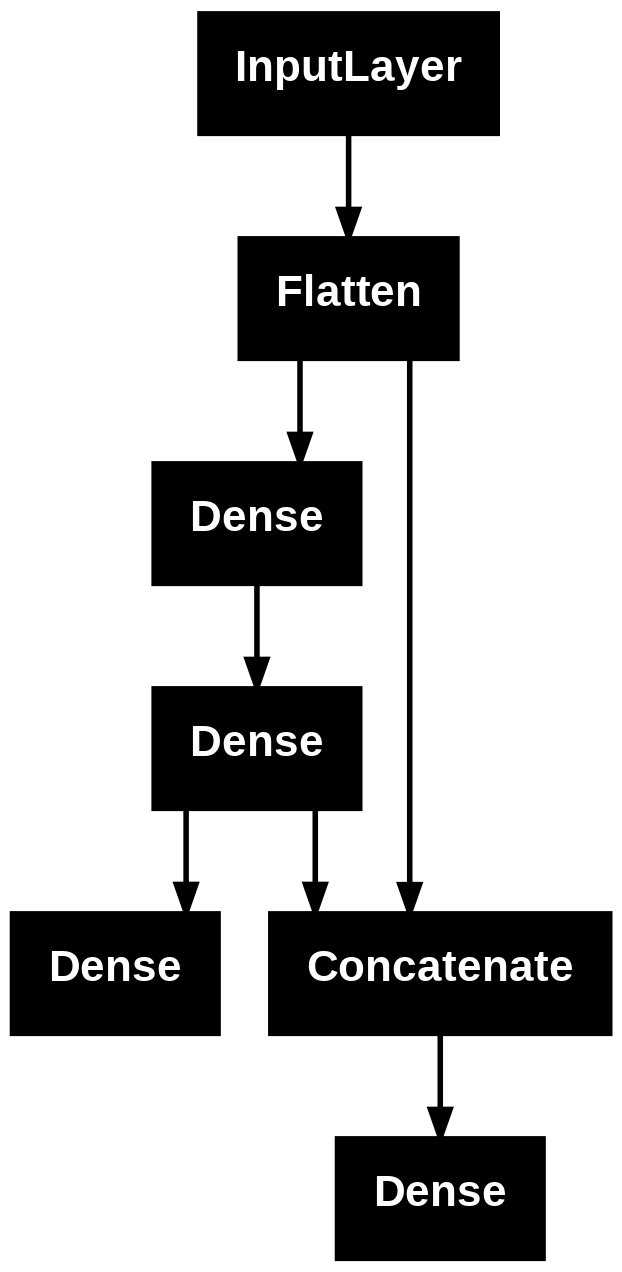

In [ ]:
#arquitectura funcional 2 / con conexiones flexibles y capa concatenate
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

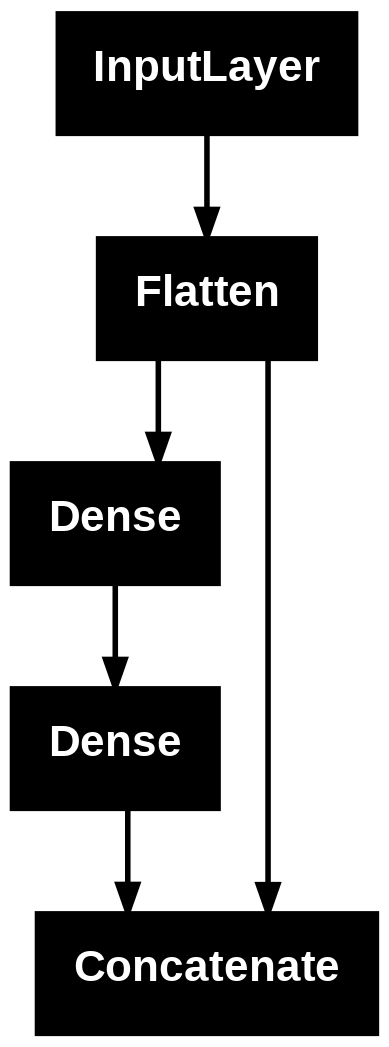

In [ ]:
#crear nuevo modelo con salida parcial para concat
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('concatenate').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!

In [ ]:
z = model_B.predict(Xtest) # salida en concatenate
z.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(10000, 834)

### Reducción de Dimensión con PCA

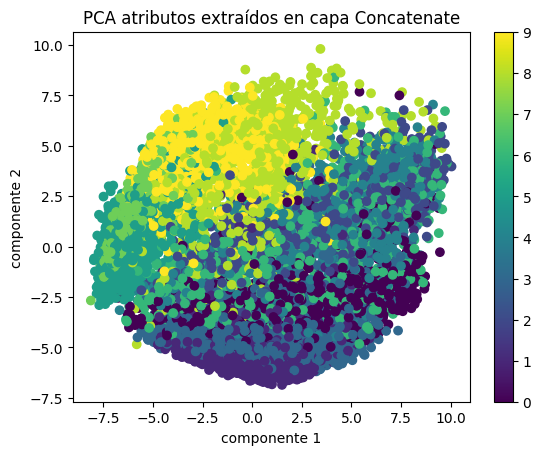

In [ ]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa Concatenate')
plt.show()

Text(0.5, 1.0, 'PCA atributos extraídos en capa concatenate')

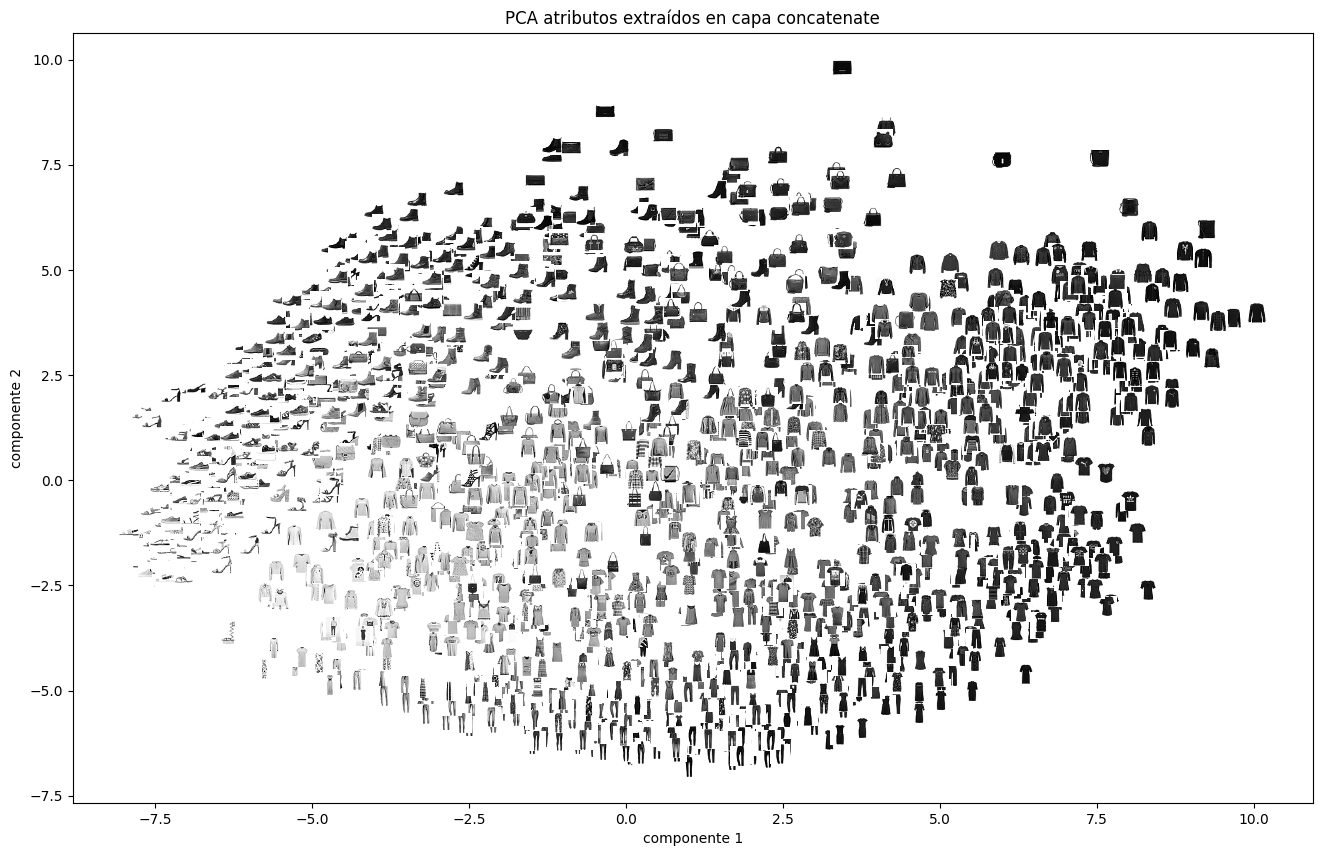

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

Ni = 2000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concatenate')


### Ejercicio 2:

Repita el proceso aplicando la técnica de reducción de dimensión UMAP de RAPIDS.

### Reducción de dimensión con UMAP de RAPIDS

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Dimensiones de los datos reducidos con UMAP: (10000, 2)


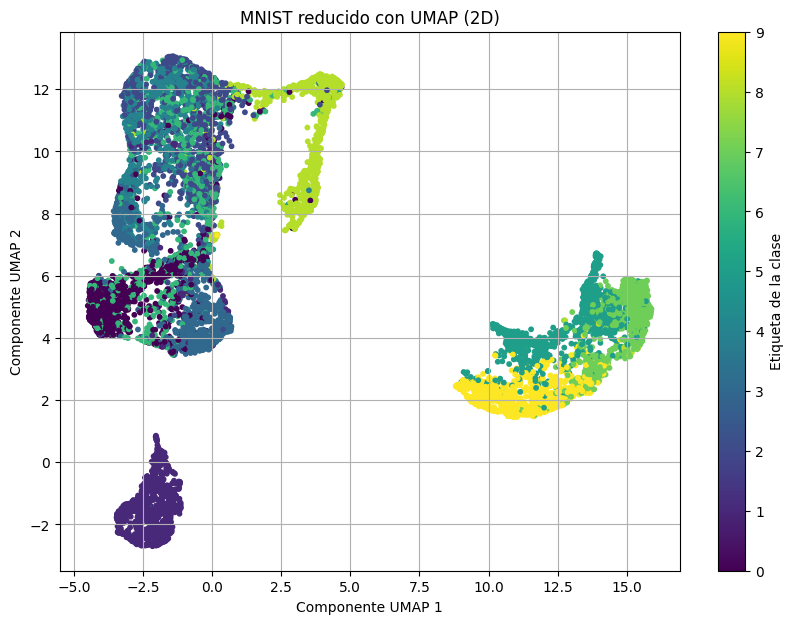

Text(0.5, 1.0, 'PCA atributos extraídos en capa concatenate')

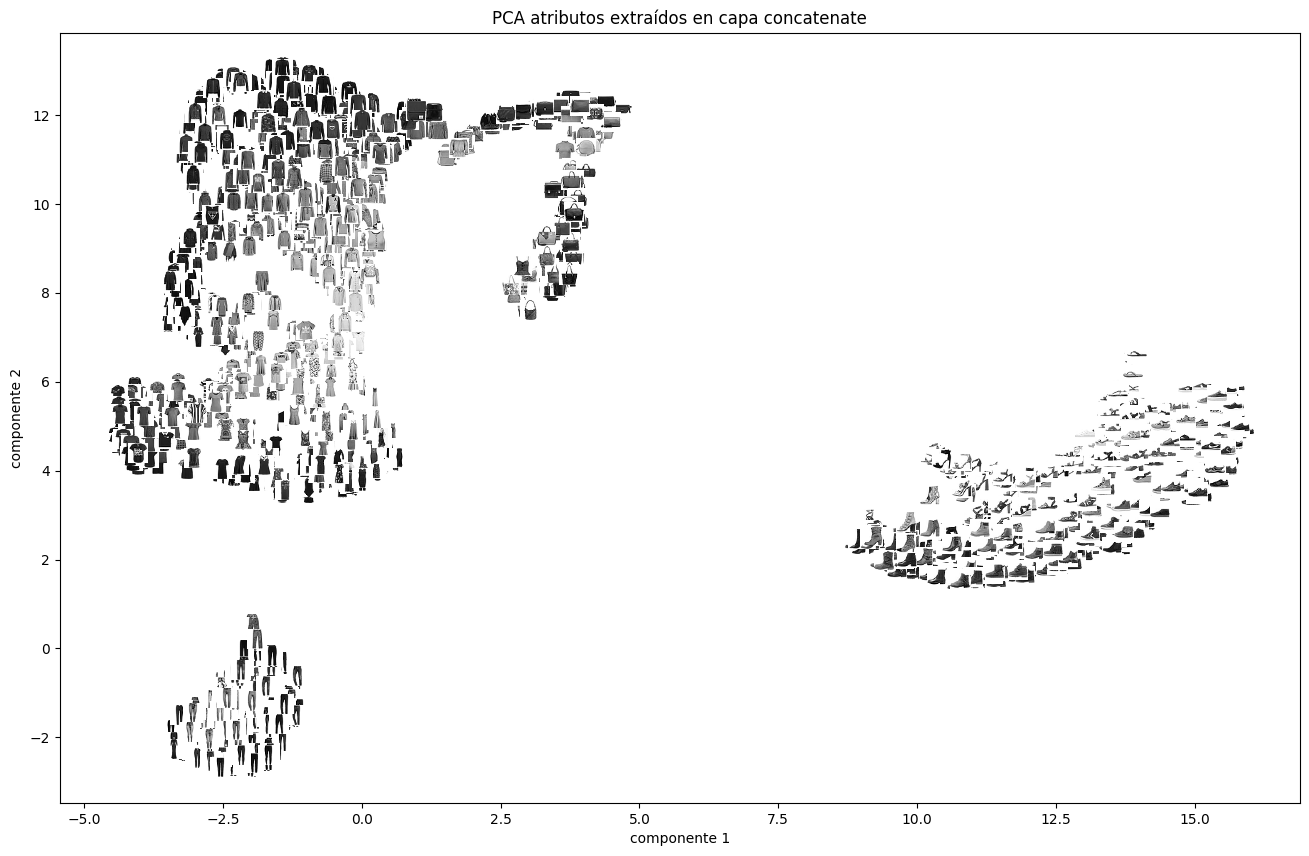

In [ ]:
import umap

# Aplicar UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_reduced_umap = umap_model.fit_transform(z)

print("Dimensiones de los datos reducidos con UMAP:", X_reduced_umap.shape)

# Visualizar los datos reducidos
plt.figure(figsize=(10, 7))
plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], c=ytest, cmap='viridis', s=10)
plt.title('MNIST reducido con UMAP (2D)')
plt.xlabel('Componente UMAP 1')
plt.ylabel('Componente UMAP 2')
plt.colorbar(label='Etiqueta de la clase')
plt.grid(True)
plt.show()

Ni = 2000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(X_reduced_umap[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concatenate')

### Usando RAPIDS

In [ ]:
!pip install cuml-cuda11

ERROR: Could not find a version that satisfies the requirement cuml-cuda11 (from versions: none)
ERROR: No matching distribution found for cuml-cuda11


[2025-11-02 21:24:51.273] [CUML] [info] build_algo set to brute_force_knn because random_state is given
Dimensiones de los datos reducidos con UMAP de RAPIDS: (10000, 2)


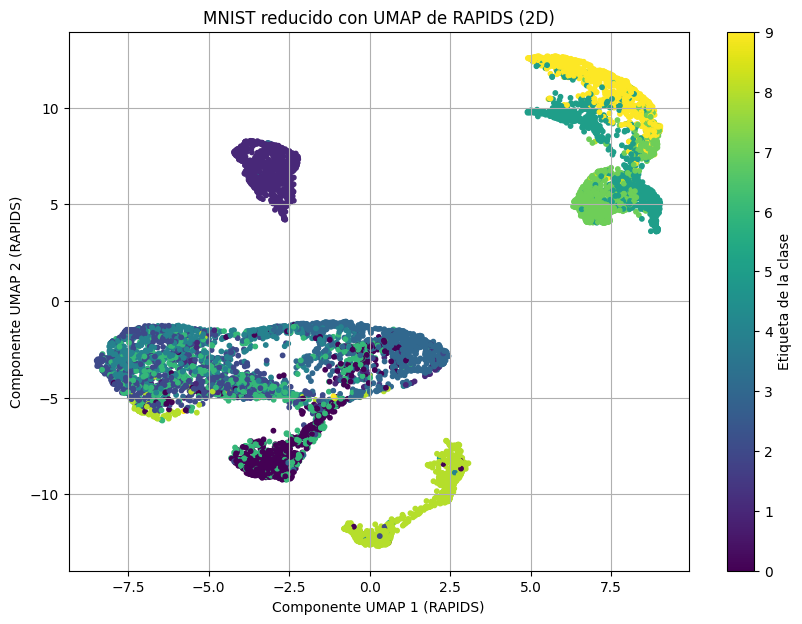

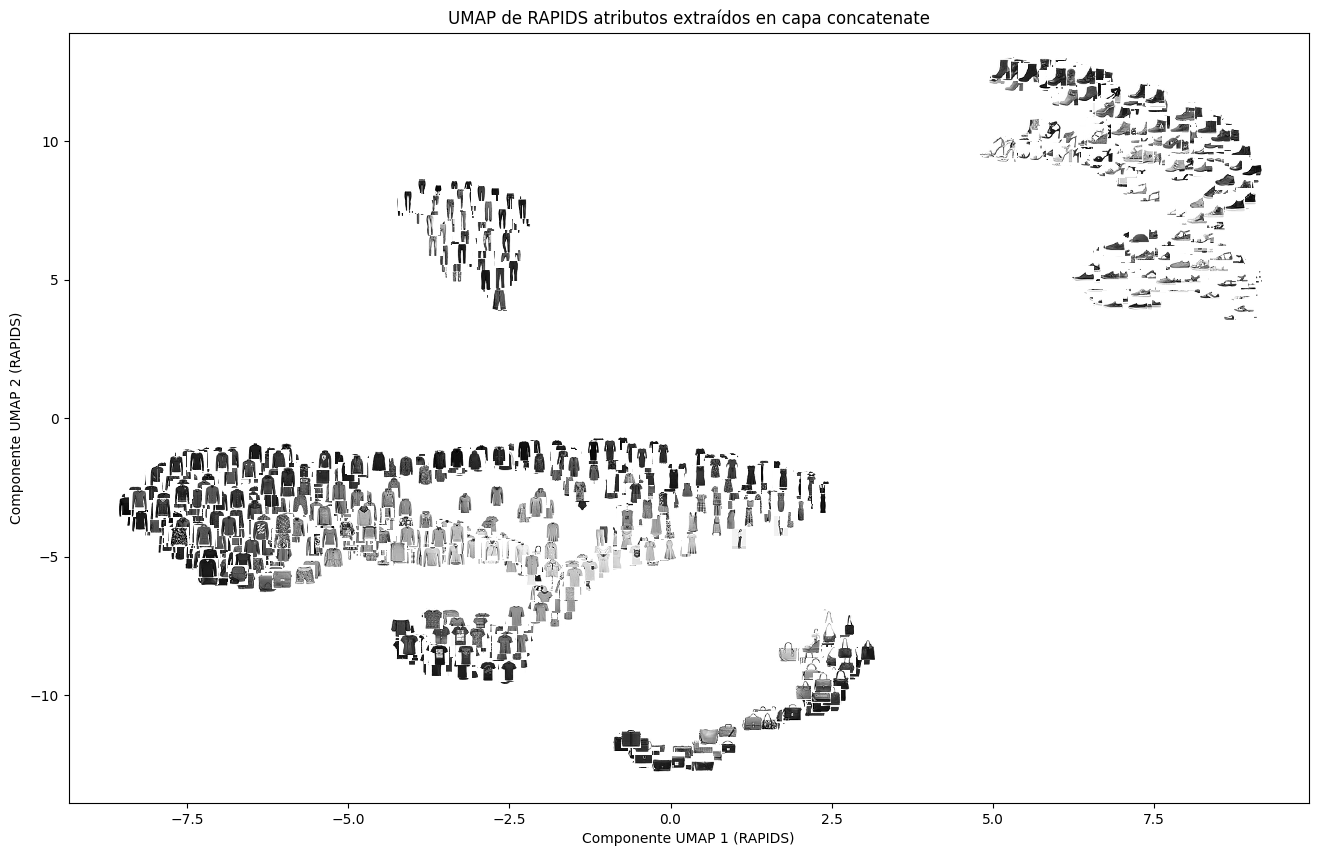

In [ ]:
from cuml.manifold import UMAP

# Aplicar UMAP de RAPIDS
umap_rapids_model = UMAP(n_components=2, random_state=42)
X_reduced_umap_rapids = umap_rapids_model.fit_transform(z)

print("Dimensiones de los datos reducidos con UMAP de RAPIDS:", X_reduced_umap_rapids.shape)

# Visualizar los datos reducidos con UMAP de RAPIDS
plt.figure(figsize=(10, 7))
plt.scatter(X_reduced_umap_rapids[:, 0], X_reduced_umap_rapids[:, 1], c=ytest, cmap='viridis', s=10)
plt.title('MNIST reducido con UMAP de RAPIDS (2D)')
plt.xlabel('Componente UMAP 1 (RAPIDS)')
plt.ylabel('Componente UMAP 2 (RAPIDS)')
plt.colorbar(label='Etiqueta de la clase')
plt.grid(True)
plt.show()

# Visualizar algunas imágenes en el espacio UMAP de RAPIDS
Ni = 2000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(X_reduced_umap_rapids[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('Componente UMAP 1 (RAPIDS)')
plt.ylabel('Componente UMAP 2 (RAPIDS)')
plt.title('UMAP de RAPIDS atributos extraídos en capa concatenate')
plt.show()

### Ejercicio 3:

Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno CNNs) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

In [ ]:
#cargar mnist-digitos
#(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


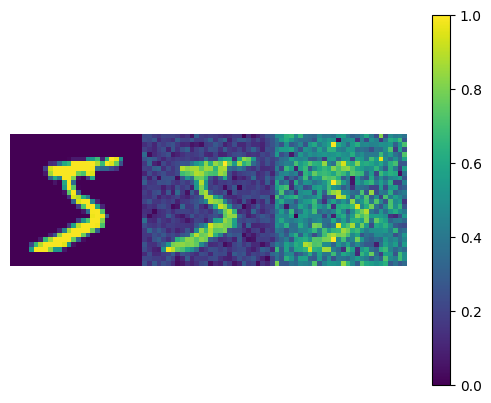

In [ ]:
#crear entradas con y sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]


plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


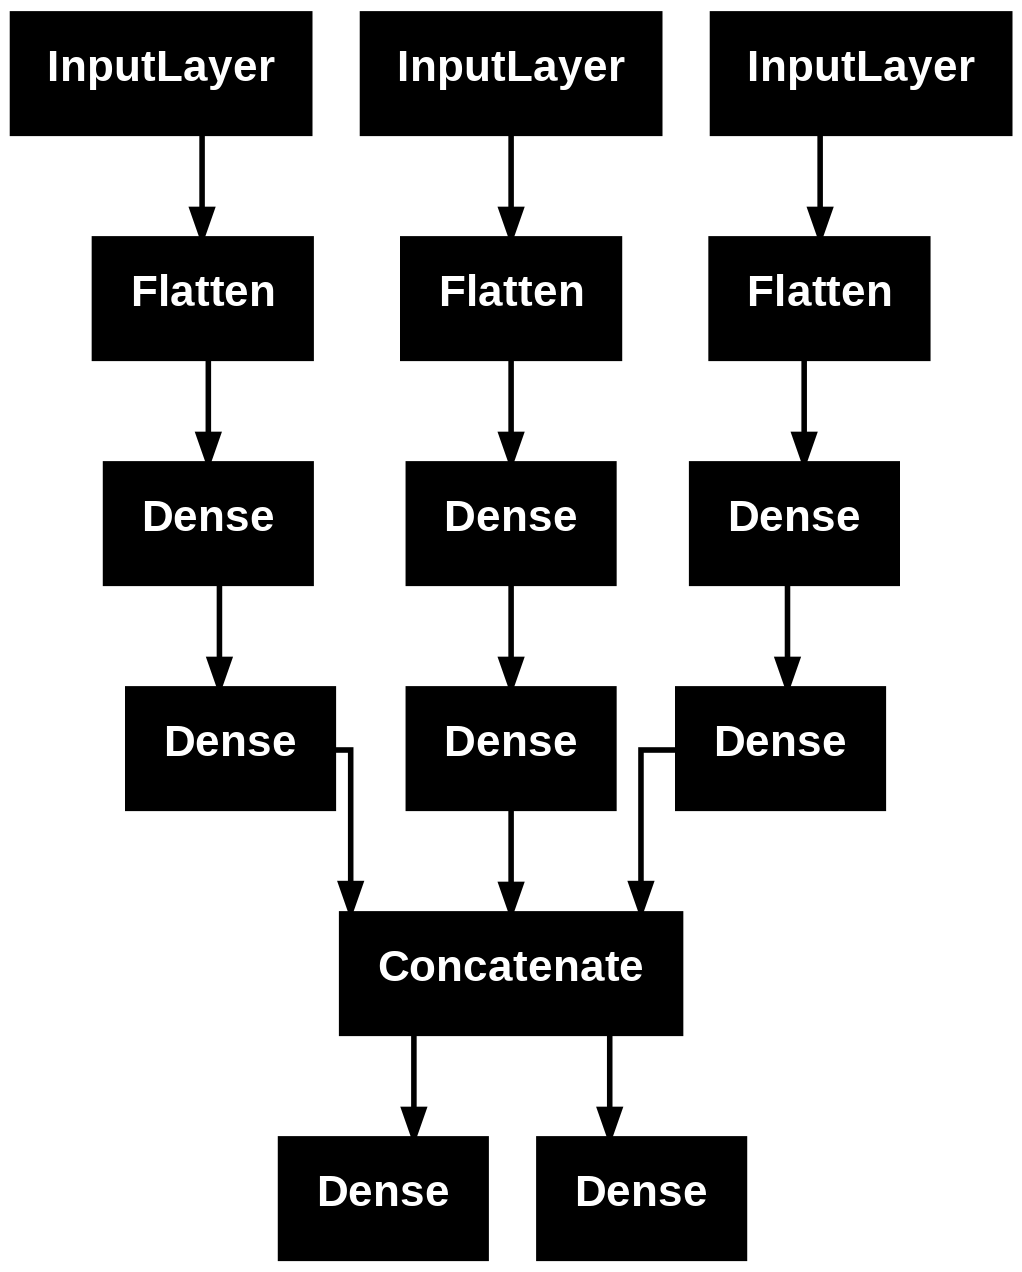

In [ ]:
#arquitectura funcional 2 - Ayuda de código con capas densas - cambiar a capas cnn
tf.keras.backend.clear_session()

conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="SAME", activation="relu")
#input_1 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_1')
#input_2 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_2')
#input_3 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_3')

flatten_1 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_1)
flatten_2 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_2)
flatten_3 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_3)

h1_1 = tf.keras.layers.Dense(200,activation='tanh',name='h1_1')(flatten_1)
h2_1 = tf.keras.layers.Dense(50,activation='tanh',name='h2_1')(h1_1)

h1_2 = tf.keras.layers.Dense(200,activation='tanh',name='h1_2')(flatten_2)
h2_2 = tf.keras.layers.Dense(50,activation='tanh',name='h2_2')(h1_2)

h1_3 = tf.keras.layers.Dense(200,activation='tanh',name='h1_3')(flatten_3)
h2_3 = tf.keras.layers.Dense(50,activation='tanh',name='h2_3')(h1_3)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2_1,h2_2,h2_3])
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(concat)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun2 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun2)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_clean         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noise1        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noise2        │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ input_clean[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │        320 │ input_noise1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │        320 │ input_noise2[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 14, 14,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 7, 7, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 7, 7, 64)  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 7, 7, 64)  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3136)      │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 3136)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,262,219 (4.81 MB)

 Trainable params: 1,262,219 (4.81 MB)

 Non-trainable params: 0 (0.00 B)

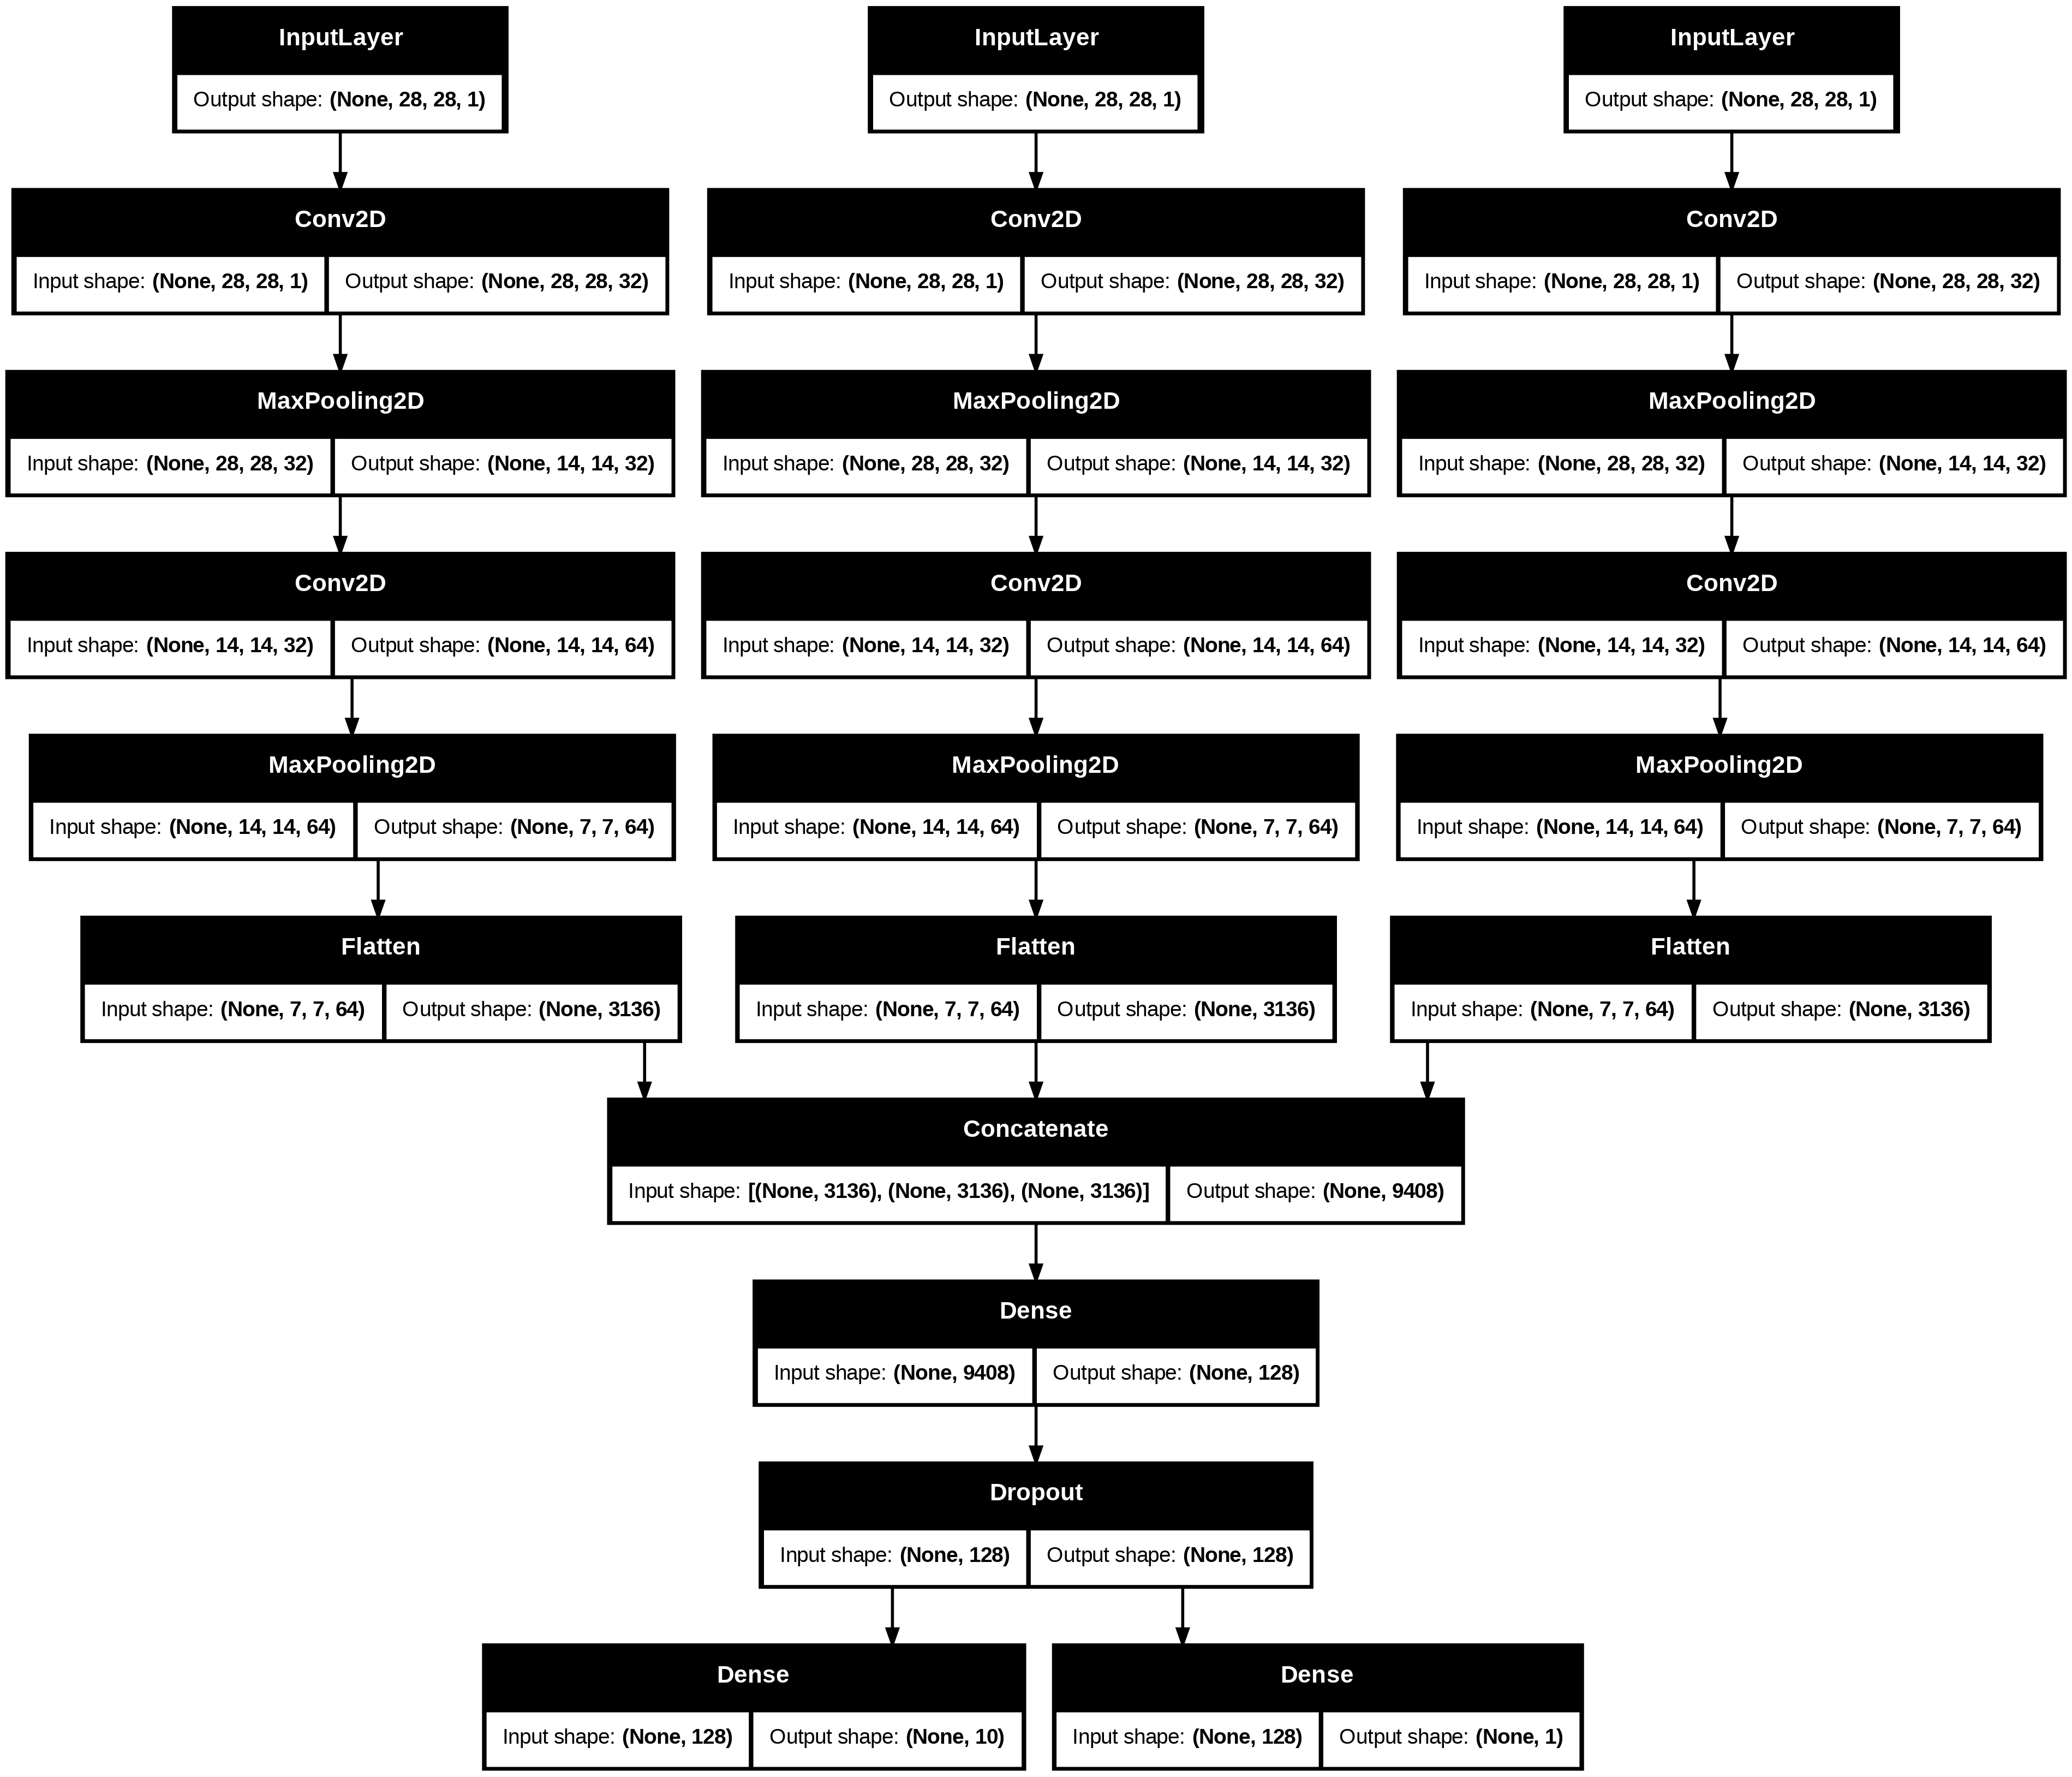

In [ ]:
tf.keras.backend.clear_session()

# Define input layers
input_clean = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='input_clean')
input_noise1 = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='input_noise1')
input_noise2 = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='input_noise2')

# Convolutional base for clean images
conv1_clean = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(input_clean)
maxpool1_clean = tf.keras.layers.MaxPooling2D(pool_size=2)(conv1_clean)
conv2_clean = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(maxpool1_clean)
maxpool2_clean = tf.keras.layers.MaxPooling2D(pool_size=2)(conv2_clean)
flatten_clean = tf.keras.layers.Flatten()(maxpool2_clean)

# Convolutional base for noise 1 images
conv1_noise1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(input_noise1)
maxpool1_noise1 = tf.keras.layers.MaxPooling2D(pool_size=2)(conv1_noise1)
conv2_noise1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(maxpool1_noise1)
maxpool2_noise1 = tf.keras.layers.MaxPooling2D(pool_size=2)(conv2_noise1)
flatten_noise1 = tf.keras.layers.Flatten()(maxpool2_noise1)

# Convolutional base for noise 2 images
conv1_noise2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(input_noise2)
maxpool1_noise2 = tf.keras.layers.MaxPooling2D(pool_size=2)(conv1_noise2)
conv2_noise2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(maxpool1_noise2)
maxpool2_noise2 = tf.keras.layers.MaxPooling2D(pool_size=2)(conv2_noise2)
flatten_noise2 = tf.keras.layers.Flatten()(maxpool2_noise2)


# Concatenate the flattened outputs
concat = tf.keras.layers.concatenate([flatten_clean, flatten_noise1, flatten_noise2])

# Dense layers after concatenation
dense1 = tf.keras.layers.Dense(128, activation='relu')(concat)
dropout = tf.keras.layers.Dropout(0.5)(dense1)


# Define the two outputs
output_digit = tf.keras.layers.Dense(10, activation='softmax', name='output_digit')(dropout) # 10 classes for digits
output_parity = tf.keras.layers.Dense(1, activation='sigmoid', name='output_parity')(dropout) # 1 for even, 0 for odd

# Create the model
model_fun_cnn = tf.keras.Model(inputs=[input_clean, input_noise1, input_noise2], outputs=[output_digit, output_parity])

# Print the model summary and plot the model
model_fun_cnn.summary()
tf.keras.utils.plot_model(model_fun_cnn, show_shapes=True)

In [ ]:
#se compila y ajusta el modelo
model_fun_cnn.compile(loss=["sparse_categorical_crossentropy", "binary_crossentropy"], optimizer="nadam", metrics=["accuracy", "accuracy"])
history = model_fun_cnn.fit([inputs_train[0], inputs_train[1], inputs_train[2]],
                            [y_train, (y_train % 2)], # Assuming y_train % 2 gives 0 for even, 1 for odd
                            epochs=10,
                            validation_data=([inputs_valid[0], inputs_valid[1], inputs_valid[2]],
                                             [y_valid, (y_valid % 2)]))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - loss: 1.8204 - output_digit_accuracy: 0.5378 - output_digit_loss: 1.3491 - output_parity_accuracy: 0.7523 - output_parity_loss: 0.4712 - val_loss: 0.3400 - val_output_digit_accuracy: 0.9357 - val_output_digit_loss: 0.2251 - val_output_parity_accuracy: 0.9620 - val_output_parity_loss: 0.1149
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5014 - output_digit_accuracy: 0.8863 - output_digit_loss: 0.3509 - output_parity_accuracy: 0.9427 - output_parity_loss: 0.1505 - val_loss: 0.2576 - val_output_digit_accuracy: 0.9469 - val_output_digit_loss: 0.1713 - val_output_parity_accuracy: 0.9675 - val_output_parity_loss: 0.0863
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.3494 - output_digit_accuracy: 0.9271 - output_digit_loss: 0.2475 - output_parity_accuracy: 0.9628 - output_parity_loss: 0.1019 - val_loss: 0.1803 - val_output_digit_accuracy: 0.9628 - val_output_digit_loss: 0.1217 - val_output_parity_accuracy

In [ ]:
# Evaluate the model
score = model_fun_cnn.evaluate([inputs_test[0], inputs_test[1], inputs_test[2]],
                                 [y_test, (y_test % 2)])
print("Test loss and accuracy:", score)

# Make predictions
predictions = model_fun_cnn.predict([inputs_test[0], inputs_test[1], inputs_test[2]])

# predictions will be a list of two arrays: one for digit predictions, one for parity predictions
digit_predictions = np.argmax(predictions[0], axis=1)
parity_predictions = np.round(predictions[1]).flatten()

print("\nSample Digit Predictions:", digit_predictions[:10])
print("Sample Parity Predictions:", parity_predictions[:10])
print("Sample True Digits:", y_test[:10])
print("Sample True Parity:", (y_test % 2)[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1728 - output_digit_accuracy: 0.9632 - output_digit_loss: 0.1292 - output_parity_accuracy: 0.9851 - output_parity_loss: 0.0436
Test loss and accuracy: [0.14322827756404877, 0.10366126894950867, 0.03939567878842354, 0.9707000255584717, 0.987500011920929]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Sample Digit Predictions: [7 2 1 0 4 1 4 9 5 9]
Sample Parity Predictions: [1. 0. 1. 0. 0. 1. 0. 1. 1. 1.]
Sample True Digits: [7 2 1 0 4 1 4 9 5 9]
Sample True Parity: [1 0 1 0 0 1 0 1 1 1]
